In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("zeesolver/consumer-behavior-and-shopping-habits-dataset")

print("Path to dataset files:", path)

100%|██████████| 146k/146k [00:00<00:00, 56.0MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/zeesolver/consumer-behavior-and-shopping-habits-dataset/versions/1


In [18]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

from matplotlib.style import use
use('ggplot')

In [5]:
os.listdir(path)

['shopping_trends.csv', 'shopping_behavior_updated.csv']

## Dicionario de dados

ID do cliente: um identificador exclusivo atribuído a cada cliente individual, facilitando o rastreamento e a análise de seu comportamento de compra ao longo do tempo.

Idade: Idade do cliente, fornecendo informações demográficas para segmentação e estratégias de marketing direcionadas.

Gênero: A identificação de gênero do cliente, uma variável demográfica fundamental que influencia as preferências de produtos e os padrões de compra.

Item comprado: O produto ou item específico selecionado pelo cliente durante a transação.

Categoria: A classificação ampla ou grupo ao qual o item comprado pertence (por exemplo, roupas, eletrônicos, mantimentos).

Valor da compra (USD): O valor monetário da transação, expresso em dólares americanos (USD), indica o custo do(s) item(ns) comprado(s).

Localização: a localização geográfica onde a compra foi feita, oferecendo insights sobre preferências regionais e tendências de mercado.

Tamanho: A especificação do tamanho (se aplicável) do item comprado, relevante para vestuário, calçados e certos bens de consumo.

Cor: A variante ou escolha de cor associada ao item comprado, influenciando as preferências do cliente e a disponibilidade do produto.

Estação: A relevância sazonal do item comprado (por exemplo, primavera, verão, outono, inverno), impactando o gerenciamento de estoque e as estratégias de marketing.

Avaliação da avaliação: Uma avaliação numérica ou qualitativa fornecida pelo cliente em relação à sua satisfação com o item comprado.

Status da assinatura : indica se o cliente optou por um serviço de assinatura, oferecendo insights sobre seu nível de fidelidade e potencial de receita recorrente.

Tipo de envio: especifica o método usado para entregar o item comprado (por exemplo, envio padrão, entrega expressa), influenciando os prazos e custos de entrega.

Desconto aplicado: indica se algum desconto promocional foi aplicado à compra, esclarecendo a sensibilidade ao preço e a eficácia da promoção.

Código promocional usado: observa se um código promocional ou cupom foi utilizado durante a transação, auxiliando na avaliação do sucesso da campanha de marketing.

Compras anteriores: fornece informações sobre o número ou a frequência de compras anteriores feitas pelo cliente, contribuindo para estratégias de segmentação e retenção de clientes.

Método de pagamento: especifica o modo de pagamento empregado pelo cliente (por exemplo, cartão de crédito, dinheiro), oferecendo insights sobre opções de pagamento preferenciais.

Frequência de compras: indica a frequência com que o cliente realiza atividades de compra, uma métrica essencial para avaliar a fidelidade do cliente e o valor vitalício.

In [13]:
df_shopping = pd.read_csv(path + "/shopping_behavior_updated.csv")
df_shopping.columns = ['id', 'idade', 'sexo', 'item_comprado', 'categoria', 'preco', 'localizacao', 'tamanho', 'cor', 'estacao', 'review', 'assinatura', 'tipo_envio', 'desconto_aplicado', 'codigo_promocional_aplicado', 'compras_anteriores', 'forma_pagamento', 'frequencia_compras']
df_shopping.head()

,id,idade,sexo,item_comprado,categoria,preco,localizacao,tamanho,cor,estacao,review,assinatura,tipo_envio,desconto_aplicado,codigo_promocional_aplicado,compras_anteriores,forma_pagamento,frequencia_compras
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [14]:
df_shopping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           3900 non-null   int64  
 1   idade                        3900 non-null   int64  
 2   sexo                         3900 non-null   object 
 3   item_comprado                3900 non-null   object 
 4   categoria                    3900 non-null   object 
 5   preco                        3900 non-null   int64  
 6   localizacao                  3900 non-null   object 
 7   tamanho                      3900 non-null   object 
 8   cor                          3900 non-null   object 
 9   estacao                      3900 non-null   object 
 10  review                       3900 non-null   float64
 11  assinatura                   3900 non-null   object 
 12  tipo_envio                   3900 non-null   object 
 13  desconto_aplicado 

In [17]:
num_columns = df_shopping.select_dtypes(include=['number']).columns.drop('id')
corr = df_shopping[num_columns].corr()

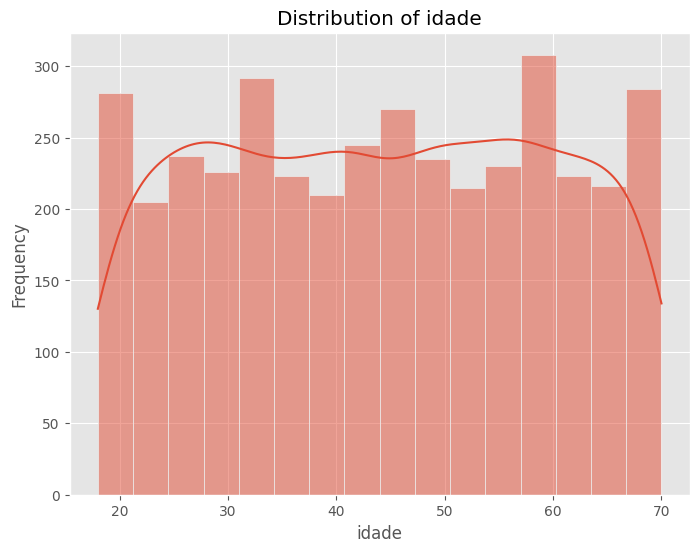

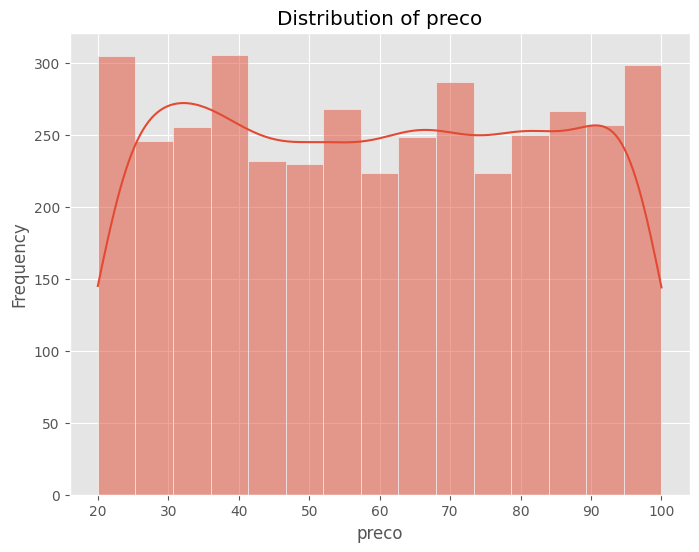

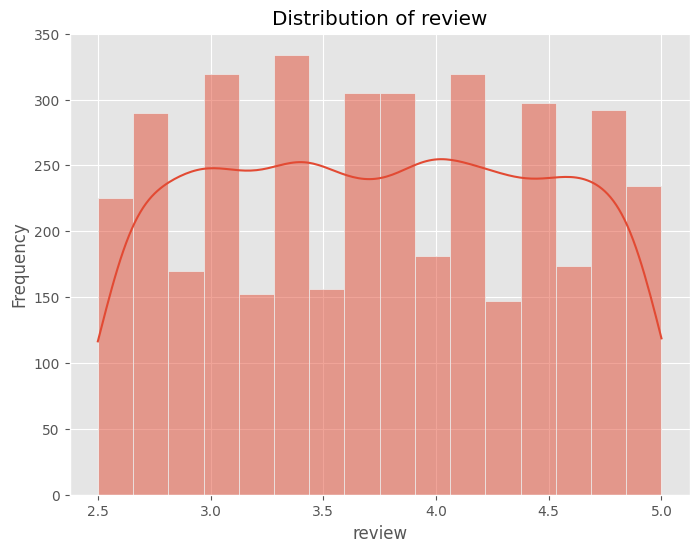

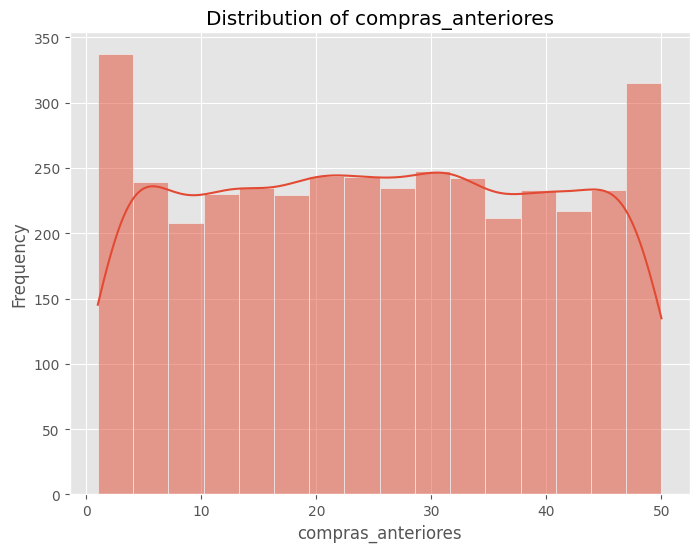

In [20]:
for column in num_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df_shopping[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

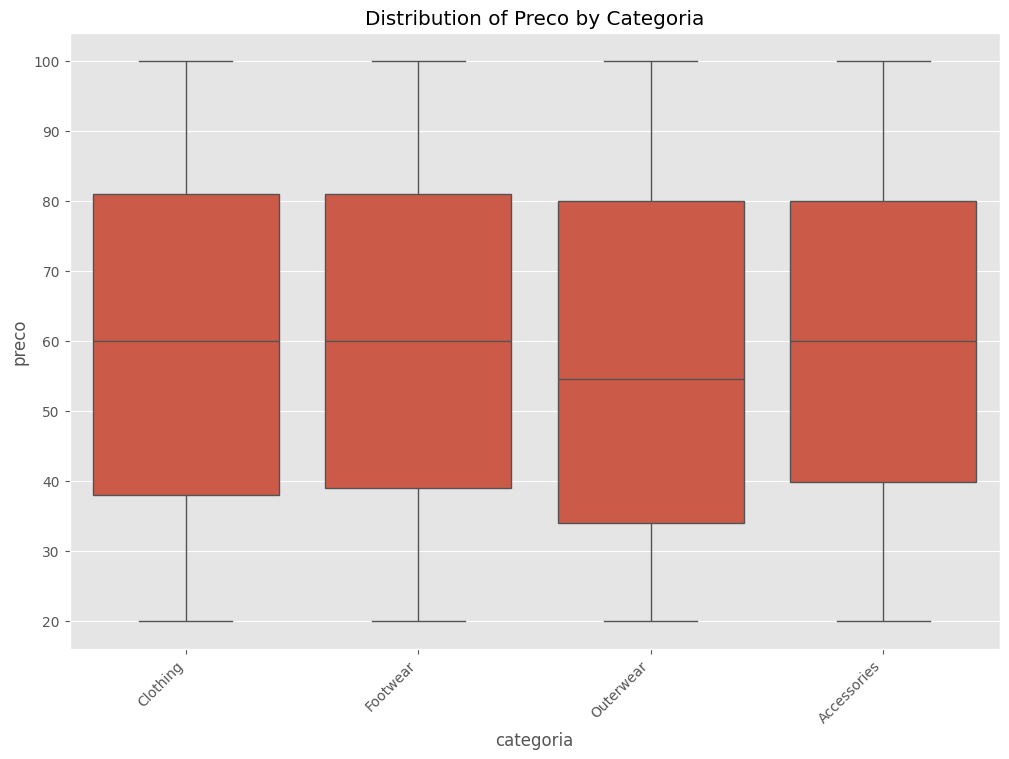

In [21]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='categoria', y='preco', data=df_shopping)
plt.title('Distribution of Preco by Categoria')
plt.xticks(rotation=45, ha='right')
plt.show()

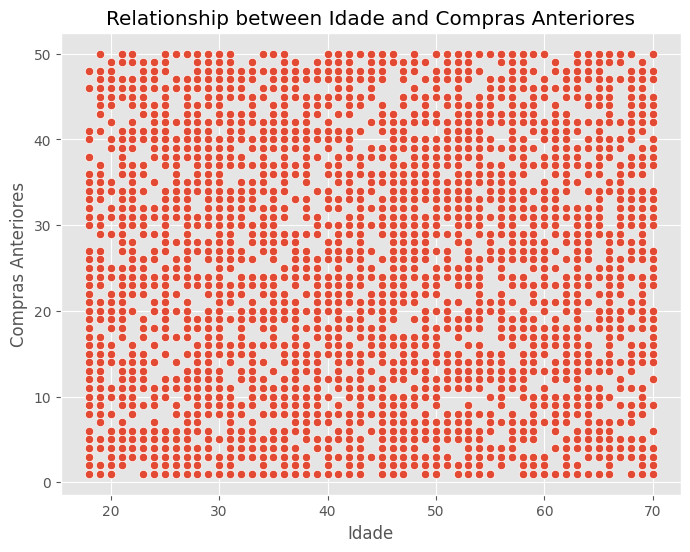

In [22]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='idade', y='compras_anteriores', data=df_shopping)
plt.title('Relationship between Idade and Compras Anteriores')
plt.xlabel('Idade')
plt.ylabel('Compras Anteriores')
plt.show()

In [23]:
df_shopping['sexo'].value_counts()

,count
sexo,
Male,2652
Female,1248


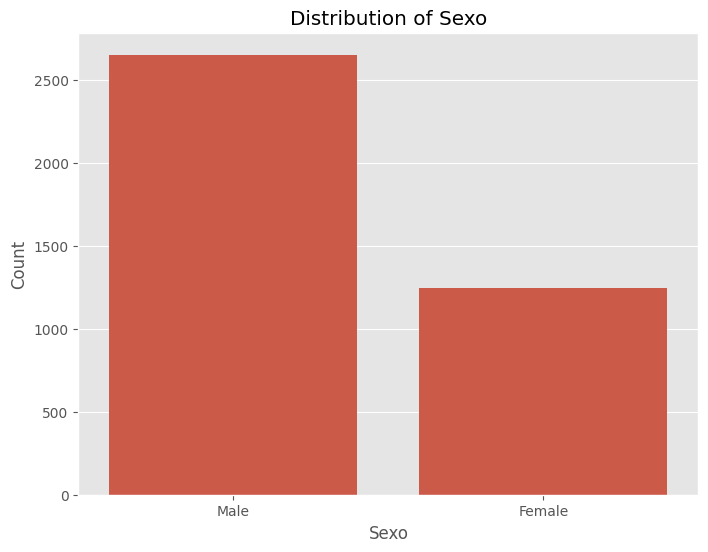

In [24]:
plt.figure(figsize=(8, 6))
sns.countplot(x='sexo', data=df_shopping)
plt.title('Distribution of Sexo')
plt.xlabel('Sexo')
plt.ylabel('Count')
plt.show()

In [25]:
pd.crosstab(df_shopping['sexo'], df_shopping['categoria'])

categoria,Accessories,Clothing,Footwear,Outerwear
sexo,,,,
Female,392,556,199,101
Male,848,1181,400,223


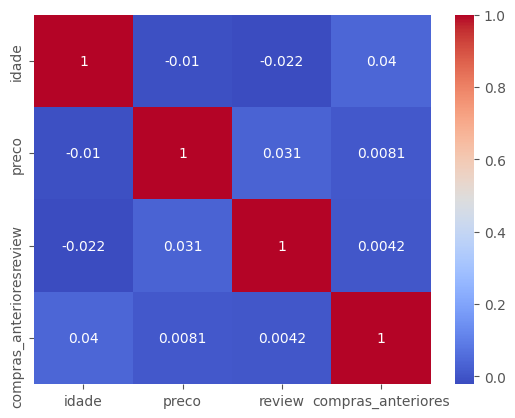

In [19]:
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()